In [1]:
from __future__ import division, print_function
import sys, os, glob, time, warnings, gc
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table, vstack, hstack, join
import fitsio
# from astropy.io import fits

import healpy as hp
from matplotlib.colors import LogNorm

In [2]:
params = {'legend.fontsize': 'large',
          'axes.labelsize': 'large',
          'axes.titlesize': 'large',
          'xtick.labelsize': 'large',
          'ytick.labelsize': 'large',
          'figure.facecolor': 'w'}
plt.rcParams.update(params)

In [3]:
sweep_list = ['sweep-000m010-010m005', 'sweep-010m010-020m005', 'sweep-020m010-030m005', 'sweep-030m010-040m005', 'sweep-040m010-050m005', 'sweep-050m010-060m005', 'sweep-060m010-070m005', 'sweep-070m010-080m005', 'sweep-120m010-130m005', 'sweep-130m010-140m005', 'sweep-140m010-150m005', 'sweep-150m010-160m005', 'sweep-160m010-170m005', 'sweep-170m010-180m005', 'sweep-180m010-190m005', 'sweep-190m010-200m005', 'sweep-200m010-210m005', 'sweep-210m010-220m005', 'sweep-220m010-230m005', 'sweep-230m010-240m005', 'sweep-300m010-310m005', 'sweep-310m010-320m005', 'sweep-320m010-330m005', 'sweep-330m010-340m005', 'sweep-340m010-350m005', 'sweep-350m010-360m005', 'sweep-000m005-010p000', 'sweep-010m005-020p000', 'sweep-020m005-030p000', 'sweep-030m005-040p000', 'sweep-040m005-050p000', 'sweep-050m005-060p000', 'sweep-060m005-070p000', 'sweep-070m005-080p000', 'sweep-110m005-120p000', 'sweep-120m005-130p000', 'sweep-130m005-140p000', 'sweep-140m005-150p000', 'sweep-150m005-160p000', 'sweep-160m005-170p000', 'sweep-170m005-180p000', 'sweep-180m005-190p000', 'sweep-190m005-200p000', 'sweep-200m005-210p000', 'sweep-210m005-220p000', 'sweep-220m005-230p000', 'sweep-230m005-240p000', 'sweep-240m005-250p000', 'sweep-250m005-260p000', 'sweep-300m005-310p000', 'sweep-310m005-320p000', 'sweep-320m005-330p000', 'sweep-330m005-340p000', 'sweep-340m005-350p000', 'sweep-350m005-360p000', 'sweep-000p000-010p005', 'sweep-010p000-020p005', 'sweep-020p000-030p005', 'sweep-030p000-040p005', 'sweep-040p000-050p005', 'sweep-050p000-060p005', 'sweep-060p000-070p005', 'sweep-070p000-080p005', 'sweep-110p000-120p005', 'sweep-120p000-130p005', 'sweep-130p000-140p005', 'sweep-140p000-150p005', 'sweep-150p000-160p005', 'sweep-160p000-170p005', 'sweep-170p000-180p005', 'sweep-180p000-190p005', 'sweep-190p000-200p005', 'sweep-200p000-210p005', 'sweep-210p000-220p005', 'sweep-220p000-230p005', 'sweep-230p000-240p005', 'sweep-240p000-250p005', 'sweep-250p000-260p005', 'sweep-300p000-310p005', 'sweep-310p000-320p005', 'sweep-320p000-330p005', 'sweep-330p000-340p005', 'sweep-340p000-350p005', 'sweep-350p000-360p005', 'sweep-000p005-010p010', 'sweep-010p005-020p010', 'sweep-020p005-030p010', 'sweep-030p005-040p010', 'sweep-040p005-050p010', 'sweep-110p005-120p010', 'sweep-120p005-130p010', 'sweep-130p005-140p010', 'sweep-140p005-150p010', 'sweep-150p005-160p010', 'sweep-160p005-170p010', 'sweep-170p005-180p010', 'sweep-180p005-190p010', 'sweep-190p005-200p010', 'sweep-200p005-210p010', 'sweep-210p005-220p010', 'sweep-220p005-230p010', 'sweep-230p005-240p010', 'sweep-240p005-250p010', 'sweep-250p005-260p010', 'sweep-260p005-270p010', 'sweep-300p005-310p010', 'sweep-310p005-320p010', 'sweep-320p005-330p010', 'sweep-330p005-340p010', 'sweep-340p005-350p010', 'sweep-350p005-360p010']
print(len(sweep_list))

111


In [4]:
# sweep_list = ['sweep-140p015-150p020', 'sweep-150p015-160p020',
#               'sweep-160p015-170p020', 'sweep-170p015-180p020', 
#               'sweep-180p015-190p020', 'sweep-190p015-200p020',
#               'sweep-140p010-150p015', 'sweep-150p010-160p015',
#               'sweep-160p010-170p015', 'sweep-170p010-180p015', 
#               'sweep-180p010-190p015', 'sweep-190p010-200p015',
#               'sweep-140p005-150p010', 'sweep-150p005-160p010',
#               'sweep-160p005-170p010', 'sweep-170p005-180p010', 
#               'sweep-180p005-190p010', 'sweep-190p005-200p010']

gaia_stack = []
cat_stack = []
for sweep_fn in sweep_list:
    
    gaia = Table(fitsio.read('/global/cfs/cdirs/desi/users/rongpu/data/gaia_dr3/dr9_south_cross_match/'+sweep_fn+'-gaia.fits'))
    cat = Table(fitsio.read('/global/cfs/cdirs/desi/users/rongpu/data/gaia_dr3/dr9_south_cross_match/'+sweep_fn+'-ls.fits'))
    print(len(gaia))

    mask = gaia['PHOT_G_MEAN_MAG']<17.65
    gaia = gaia[mask]
    cat = cat[mask]
    print(len(gaia))

    # maskbits = [0, 2, 3, 4, 5, 6, 7, 10, 12, 13]
    maskbits = [0, 1, 10, 12, 13]
    mask_clean = np.ones(len(cat), dtype=bool)
    for bit in maskbits:
        mask_clean &= (cat['MASKBITS'] & 2**bit)==0
    print(np.sum(~mask_clean)/len(mask_clean))
    gaia = gaia[mask_clean]
    cat = cat[mask_clean]
    print(len(gaia))

    mask = (cat['FLUX_G']>0) & (cat['FLUX_R']>0) & (cat['FLUX_Z']>0)
    mask &= (cat['FLUX_IVAR_G']>0) & (cat['FLUX_IVAR_R']>0) & (cat['FLUX_IVAR_Z']>0)
    mask &= (cat['FRACFLUX_G']<0.1) & (cat['FRACFLUX_R']<0.1) & (cat['FRACFLUX_Z']<0.1)
    gaia = gaia[mask]
    cat = cat[mask]
    print(len(gaia))
    
    gaia_stack.append(gaia)
    cat_stack.append(cat)
    print()

gaia = vstack(gaia_stack)
cat = vstack(cat_stack)

17700
17498
0.07600868670705223
16168
15995

26481
26212
0.0666870135815657
24464
24114

29167
28865
0.08460072752468387
26423
26175

27685
27414
0.09250747793098417
24878
24687

22625
22468
0.08692362471069966
20515
20358

26835
26618
0.08020888120820498
24483
24279

50139
49838
0.06625466511497251
46536
46015

42934
42745
0.07032401450462042
39739
39131

91410
91233
0.06143610316442515
85628
52039

86464
86190
0.0625826662025757
80796
79651

52218
51968
0.07104371921182266
48276
47595

21615
21488
0.07278481012658228
19924
19746

14225
14102
0.06963551269323501
13120
13019

20726
20539
0.059691318954184724
19313
19089

36410
36145
0.06105962097108867
33938
33364

43476
43194
0.0653099967588091
40373
39870

49997
49697
0.06056703623961205
46687
46071

42978
42769
0.060885220603708295
40165
36094

39011
38874
0.05227144106600813
36842
32080

352
352
0.045454545454545456
336
326

74911
74809
0.04716010105735941
71281
47875

134873
134597
0.05391650631143339
127340
125360

85582
85272
0.

In [5]:
print(len(cat))

4553051


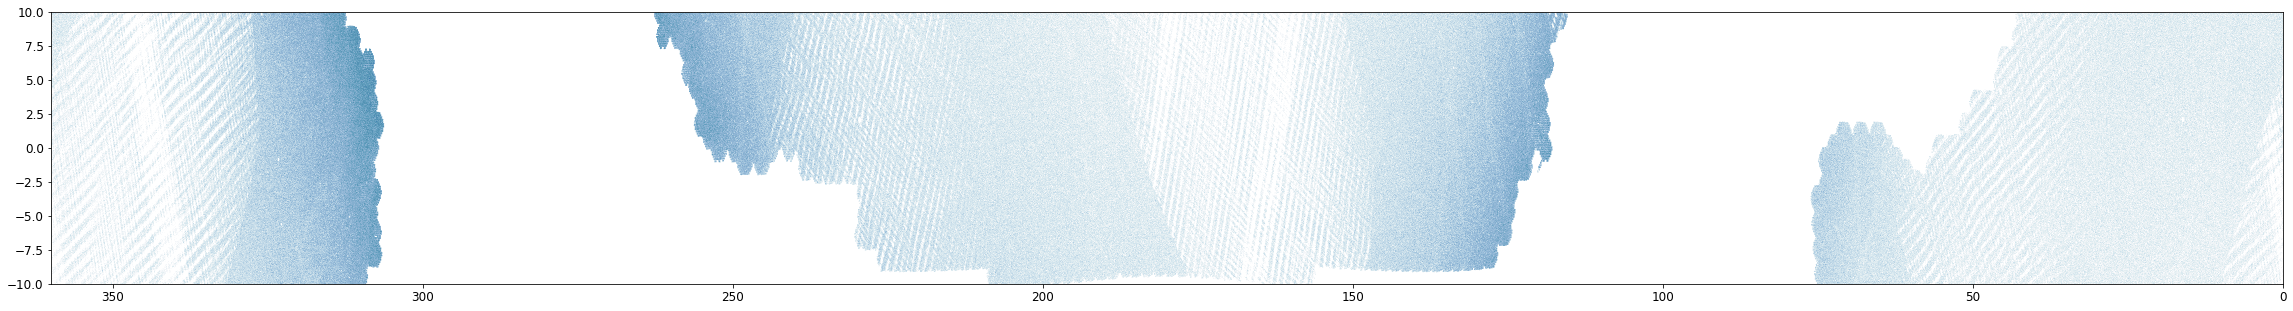

In [6]:
plt.figure(figsize=(40, 5))
plt.plot(cat['RA'], cat['DEC'], '.', ms=0.1, alpha=0.1)
plt.axis([360, 0, -10, 10])
plt.show()

In [7]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    cat['gmag'] = 22.5 - 2.5*np.log10(cat['FLUX_G'])
    cat['rmag'] = 22.5 - 2.5*np.log10(cat['FLUX_R'])
    cat['zmag'] = 22.5 - 2.5*np.log10(cat['FLUX_Z'])
    gaia['gmag'] = 22.5 - 2.5*np.log10(gaia['flux_g'])
    gaia['rmag'] = 22.5 - 2.5*np.log10(gaia['flux_r'])
    gaia['zmag'] = 22.5 - 2.5*np.log10(gaia['flux_z'])

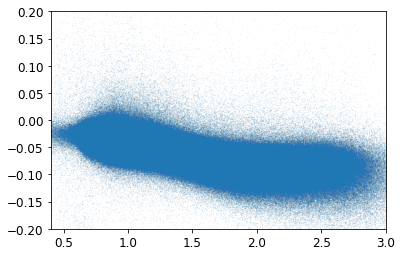

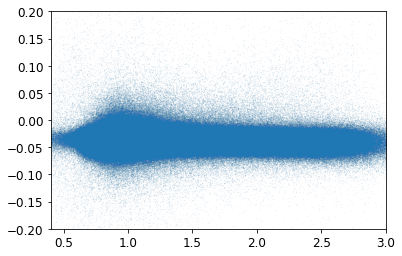

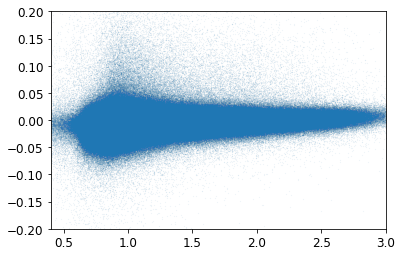

In [8]:
mask = (cat['ANYMASK_G']==0)
plt.plot(gaia['PHOT_BP_MEAN_MAG'][mask]-gaia['PHOT_RP_MEAN_MAG'][mask], (cat['gmag']-gaia['gmag'])[mask], '.', ms=00.1, alpha=0.5)
plt.axis([0.4, 3., -0.2, 0.2])
plt.show()

mask = (cat['ANYMASK_R']==0)
plt.plot(gaia['PHOT_BP_MEAN_MAG'][mask]-gaia['PHOT_RP_MEAN_MAG'][mask], (cat['rmag']-gaia['rmag'])[mask], '.', ms=00.1, alpha=0.5)
plt.axis([0.4, 3., -0.2, 0.2])
plt.show()

mask = (cat['ANYMASK_Z']==0)
plt.plot(gaia['PHOT_BP_MEAN_MAG'][mask]-gaia['PHOT_RP_MEAN_MAG'][mask], (cat['zmag']-gaia['zmag'])[mask], '.', ms=00.1, alpha=0.5)
plt.axis([0.4, 3., -0.2, 0.2])
plt.show()

In [9]:
import statsmodels.api as sm

def rlm_fit1d(x, y, t=1.5, order=1):
    '''
    1D robust polynomial fit.
    
    Given x array and y array, calculate the 1D robust 
    polynomial fit of arbitrary order. Huber weight
    function is used. 
    
    See also poly_val1d.py
    
    INPUT:
    1D arrays of x and y values; tunning parameter t; 
    order of the polynomial fit.
    
    OUTPUT:
    Array of parameters of the polynomial [a0, a1, a2 ...] 
    so that y = a0 + a1*x + a2*x**2 + ...
    '''
    
    ncols = order+1
    a = np.zeros((x.size,ncols))
    for i in range(order+1):
        a[:,i] = x**i
    res = sm.RLM(y, a, M=sm.robust.norms.HuberT(t=t)).fit()
    m = res.params
    return(m)

def poly_val1d(x, m):
    '''
    Evaluate the 1D polynomial from x values and polynomial parameters
    
    See also rlm_fit1d.py
    
    INPUT:
    1D array of x values; 
    1D array of polynomial parameters (for example generated by 
    rlm_fit1d.py).
    
    OUTPUT:
    1D array of the evaluated values of the polynomial.
    '''
    
    order = len(m)-1
    z = np.zeros(x.shape)
    for i in range(order+1):
        z += m[i] * x**i
    return z

In [17]:
coeffs = {}

for band in ['g', 'r', 'z']:
    mask = (cat['ANYMASK_'+band.upper()]==0)
    # mask &= (gaia['PHOT_BP_MEAN_MAG']-gaia['PHOT_RP_MEAN_MAG'])>-0.6
    # mask &= (gaia['PHOT_BP_MEAN_MAG']-gaia['PHOT_RP_MEAN_MAG'])<4.5
    mask &= (gaia['PHOT_BP_MEAN_MAG']-gaia['PHOT_RP_MEAN_MAG'])>0.5
    mask &= (gaia['PHOT_BP_MEAN_MAG']-gaia['PHOT_RP_MEAN_MAG'])<3.0
    x = (gaia['PHOT_BP_MEAN_MAG']-gaia['PHOT_RP_MEAN_MAG'])[mask]
    y = (cat[band+'mag']-gaia[band+'mag'])[mask]
    poly_order = 5
    coeffs[band] = rlm_fit1d(x, y, t=0.02, order=poly_order)
    print(band)
    print(coeffs[band])

g
[ 0.02908537 -0.251246    0.44046418 -0.37733601  0.1398971  -0.01851623]
r
[-0.06117009  0.07167416 -0.06489573  0.02484119 -0.00394541  0.00015109]
z
[-0.06066142  0.13234404 -0.11567088  0.04708177 -0.00845653  0.00051639]


In [18]:
np.set_printoptions(precision=5)
float_formatter = "{:.10f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})

coeffs

{'g': array([0.0290853720, -0.2512460050, 0.4404641812, -0.3773360105,
        0.1398971000, -0.0185162342]),
 'r': array([-0.0611700882, 0.0716741628, -0.0648957317, 0.0248411929,
        -0.0039454092, 0.0001510852]),
 'z': array([-0.0606614222, 0.1323440401, -0.1156708755, 0.0470817681,
        -0.0084565308, 0.0005163927])}

In [25]:
coeffs = {'g': np.array([0.0290853720, -0.2512460050, 0.4404641812, -0.3773360105,
        0.1398971000, -0.0185162342]),
 'r': np.array([-0.0611700882, 0.0716741628, -0.0648957317, 0.0248411929,
        -0.0039454092, 0.0001510852]),
 'z': np.array([-0.0606614222, 0.1323440401, -0.1156708755, 0.0470817681,
        -0.0084565308, 0.0005163927])}

__Transformations are only valid for 0.5<BP-RP<3.0__

In [26]:
for band in ['g', 'r', 'z']:
    x = (gaia['PHOT_BP_MEAN_MAG']-gaia['PHOT_RP_MEAN_MAG'])
    gaia[band+'mag_std'] = gaia[band+'mag'] + poly_val1d(x, coeffs[band])

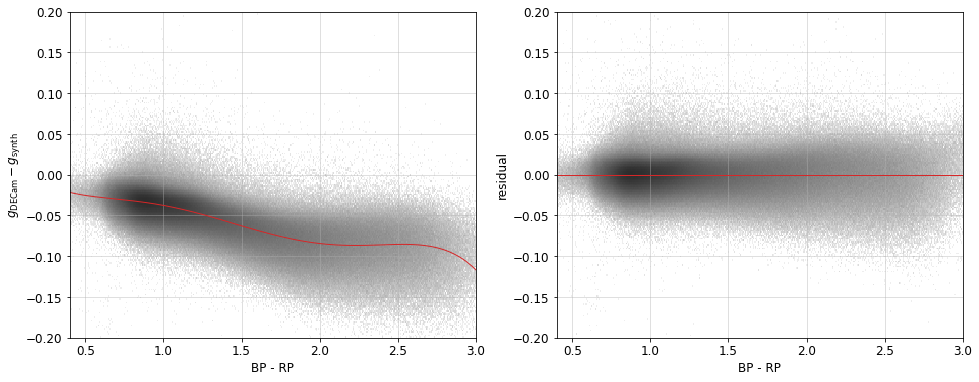

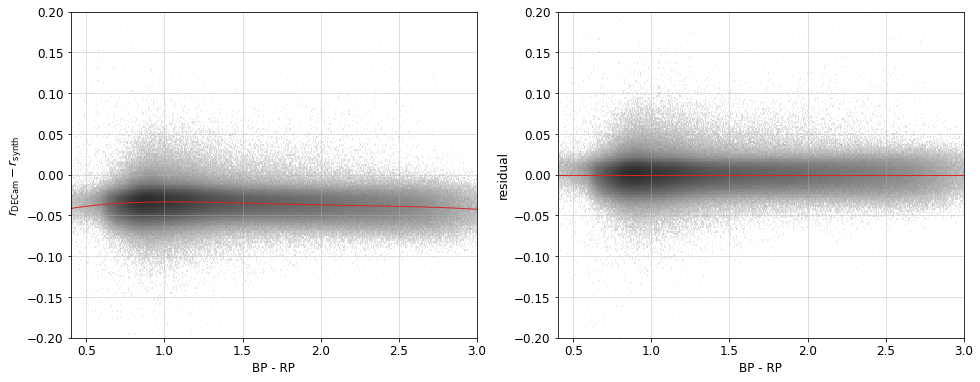

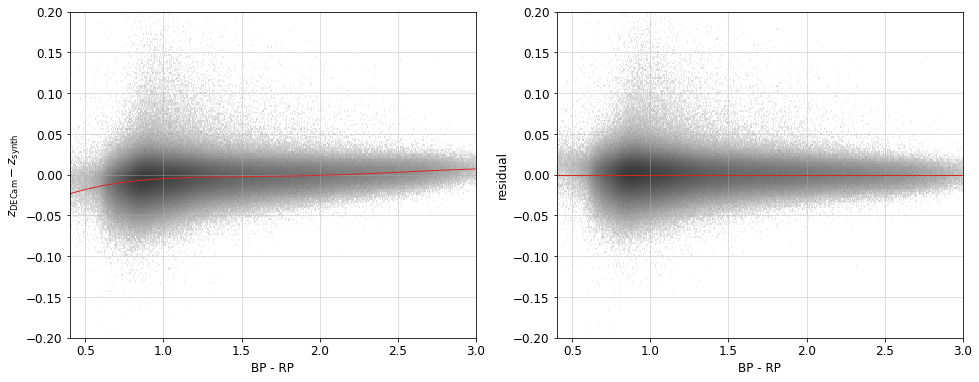

In [27]:
for band in ['g', 'r', 'z']:
    mask = (cat['ANYMASK_'+band.upper()]==0)
    x = (gaia['PHOT_BP_MEAN_MAG']-gaia['PHOT_RP_MEAN_MAG'])[mask]
    y = (cat[band+'mag']-gaia[band+'mag'])[mask]

    y_predict = poly_val1d(x, coeffs[band])
    x_plot = np.linspace(0, 4, 200)
    y_plot = poly_val1d(x_plot, coeffs[band])

    xbins, ybins = np.linspace(0.4, 3., 400), np.linspace(-0.2, 0.2, 200)

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    ax = axes[0]
    ax.hist2d(x, y, bins=[xbins, ybins], cmap='gray_r', norm=LogNorm(vmin=1, vmax=20000))
    ax.plot(x_plot, y_plot, '-', lw=1., color='C3')
    ax.set_xlabel('BP - RP')
    ylabel = '$'+band+'_\mathrm{DECam} - '+band+'_\mathrm{synth}$'
    ax.set_ylabel(ylabel)
    ax.axis([0.4, 3., -0.2, 0.2])
    ax.grid(alpha=0.5)
    ax = axes[1]
    ax.hist2d(x, y-y_predict, bins=[xbins, ybins], cmap='gray_r', norm=LogNorm(vmin=1, vmax=20000))
    ax.axhline(0, lw=1, color='C3', ls='-')
    ax.set_xlabel('BP - RP')
    ax.set_ylabel('residual')
    ax.axis([0.4, 3., -0.2, 0.2])
    ax.grid(alpha=0.5)
    plt.show()

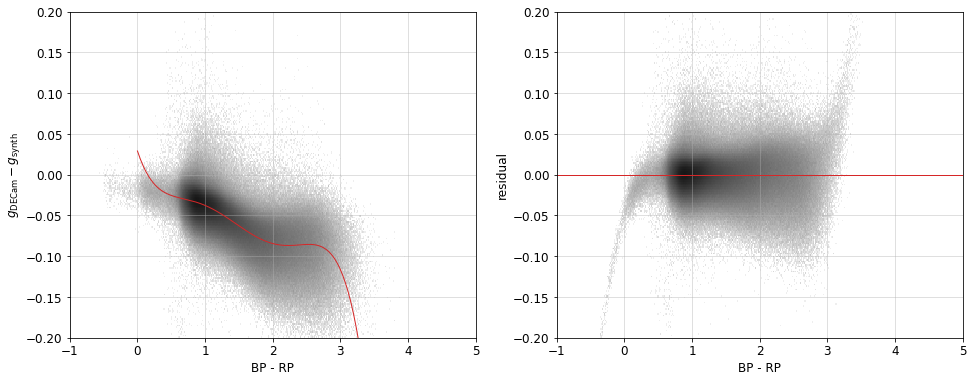

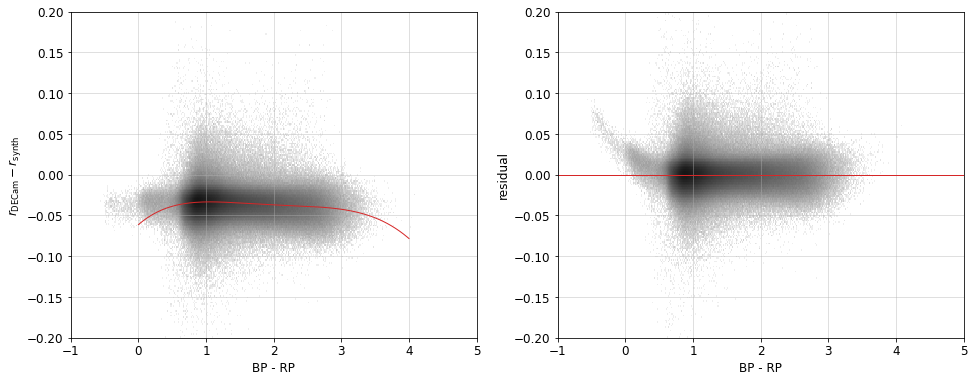

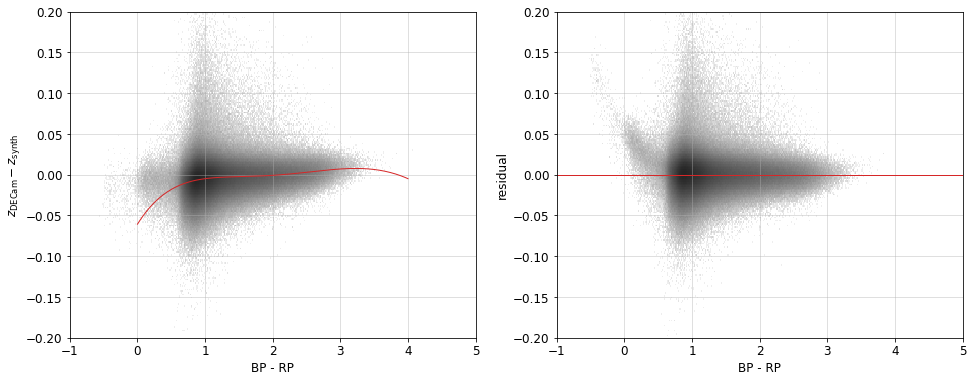

In [28]:
for band in ['g', 'r', 'z']:
    mask = (cat['ANYMASK_'+band.upper()]==0)
    x = (gaia['PHOT_BP_MEAN_MAG']-gaia['PHOT_RP_MEAN_MAG'])[mask]
    y = (cat[band+'mag']-gaia[band+'mag'])[mask]

    y_predict = poly_val1d(x, coeffs[band])
    x_plot = np.linspace(0, 4, 200)
    y_plot = poly_val1d(x_plot, coeffs[band])

    xbins, ybins = np.linspace(-1, 5, 400), np.linspace(-0.2, 0.2, 200)

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    ax = axes[0]
    ax.hist2d(x, y, bins=[xbins, ybins], cmap='gray_r', norm=LogNorm(vmin=1, vmax=20000))
    ax.plot(x_plot, y_plot, '-', lw=1., color='C3')
    ax.set_xlabel('BP - RP')
    ylabel = '$'+band+'_\mathrm{DECam} - '+band+'_\mathrm{synth}$'
    ax.set_ylabel(ylabel)
    ax.axis([-1, 5, -0.2, 0.2])
    ax.grid(alpha=0.5)
    ax = axes[1]
    ax.hist2d(x, y-y_predict, bins=[xbins, ybins], cmap='gray_r', norm=LogNorm(vmin=1, vmax=20000))
    ax.axhline(0, lw=1, color='C3', ls='-')
    ax.set_xlabel('BP - RP')
    ax.set_ylabel('residual')
    ax.axis([-1, 5, -0.2, 0.2])
    ax.grid(alpha=0.5)
    plt.show()

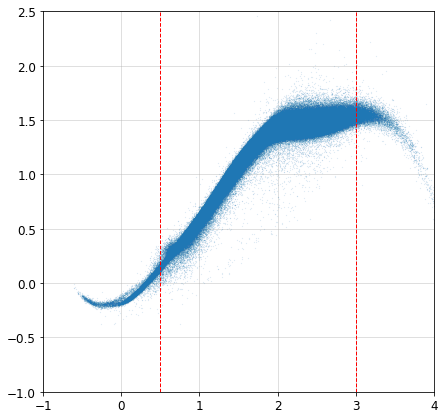

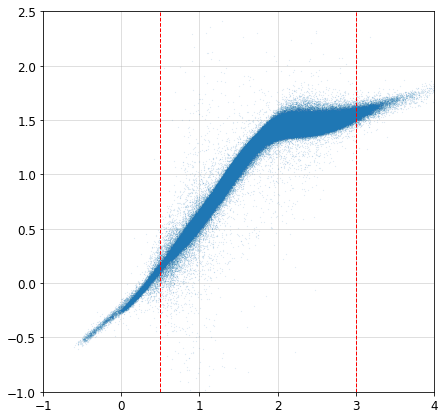

In [29]:
x = gaia['PHOT_BP_MEAN_MAG']-gaia['PHOT_RP_MEAN_MAG']
y = gaia['gmag_std'] - gaia['rmag_std']
mask = (x<100)
plt.figure(figsize=(7, 7))
plt.plot(x[mask], y[mask], '.', ms=0.1)
plt.axis([-1, 4, -1, 2.5])
plt.axvline(0.5, lw=1, ls='--', color='r')
plt.axvline(3., lw=1, ls='--', color='r')
plt.grid(alpha=0.5)
plt.show()

x = gaia['PHOT_BP_MEAN_MAG']-gaia['PHOT_RP_MEAN_MAG']
y = cat['gmag'] - cat['rmag']
mask = (x<100)
mask &= (cat['ANYMASK_G']==0) & (cat['ANYMASK_R']==0)
plt.figure(figsize=(7, 7))
plt.plot(x[mask], y[mask], '.', ms=0.1)
plt.axis([-1, 4, -1, 2.5])
plt.axvline(0.5, lw=1, ls='--', color='r')
plt.axvline(3., lw=1, ls='--', color='r')
plt.grid(alpha=0.5)
plt.show()

3680483


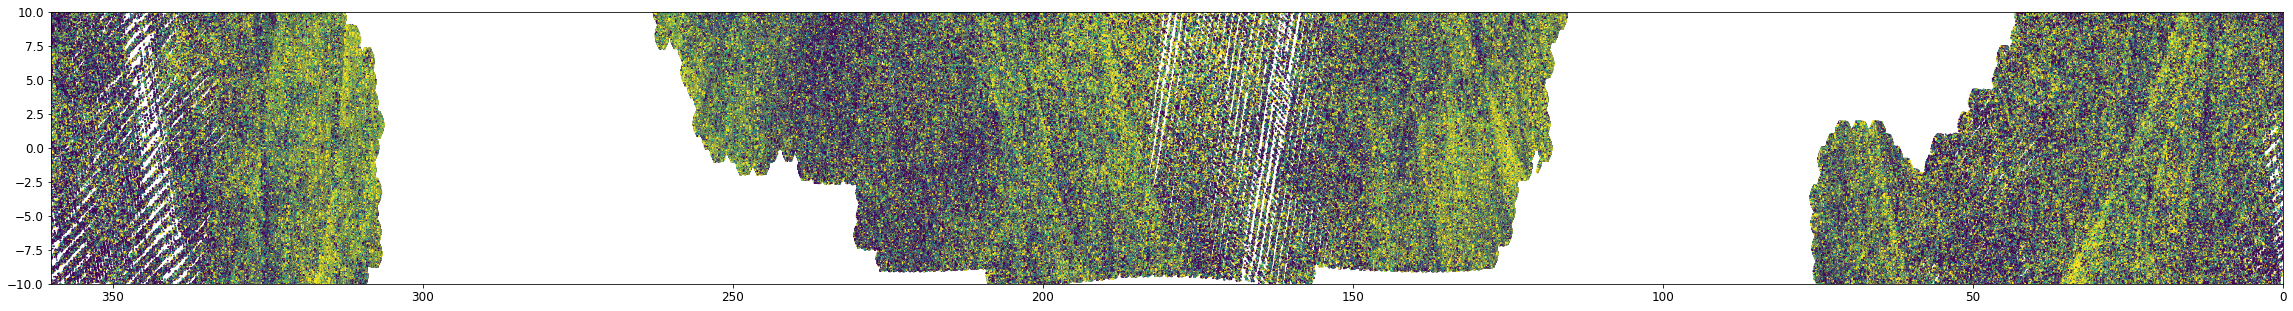

In [30]:
band = 'g'
mask = (cat['ANYMASK_'+band.upper()]==0)
mask &= (gaia['PHOT_BP_MEAN_MAG']-gaia['PHOT_RP_MEAN_MAG'])>0.6
mask &= (gaia['PHOT_BP_MEAN_MAG']-gaia['PHOT_RP_MEAN_MAG'])<2.5
idx = np.where(mask)[0]
print(len(idx))
# idx = np.sort(np.random.choice(idx, size=len(idx)//10))

plt.figure(figsize=(40, 5))
plt.scatter(cat['RA'][idx], cat['DEC'][idx], c=(cat[band+'mag'] - gaia[band+'mag_std'])[idx], s=0.5, vmin=-0.01, vmax=0.01)
plt.axis([360, 0, -10, 10])
plt.show()

3407628


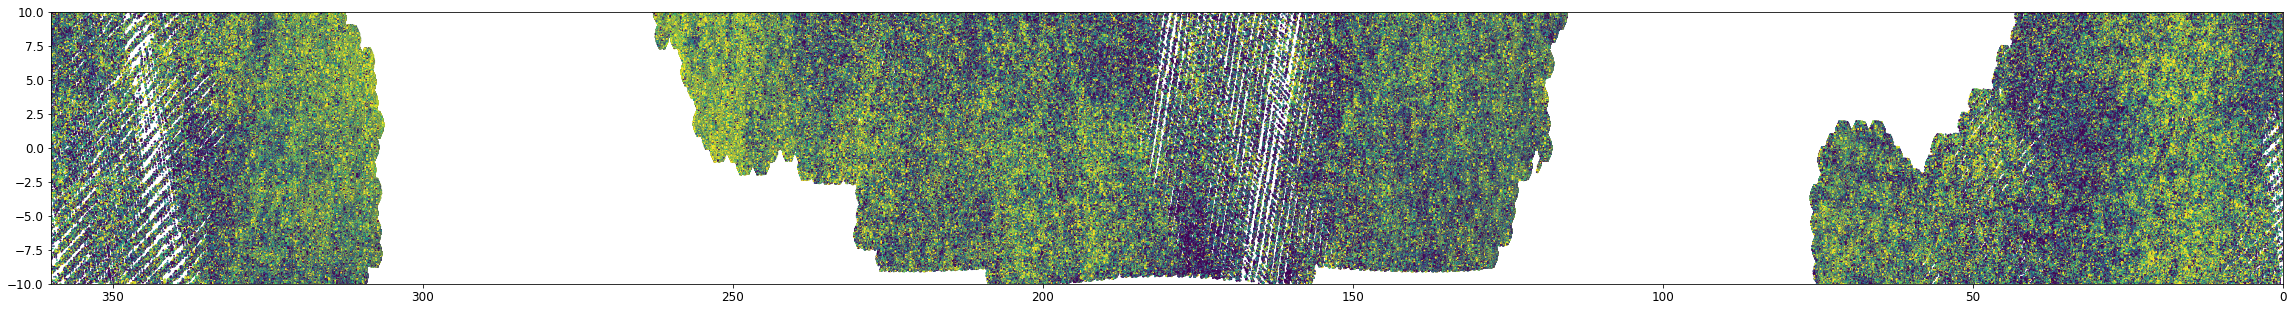

In [31]:
band = 'r'
mask = (cat['ANYMASK_'+band.upper()]==0)
mask &= (gaia['PHOT_BP_MEAN_MAG']-gaia['PHOT_RP_MEAN_MAG'])>0.6
mask &= (gaia['PHOT_BP_MEAN_MAG']-gaia['PHOT_RP_MEAN_MAG'])<2.5
idx = np.where(mask)[0]
print(len(idx))
# idx = np.sort(np.random.choice(idx, size=len(idx)//10))

plt.figure(figsize=(40, 5))
plt.scatter(cat['RA'][idx], cat['DEC'][idx], c=(cat[band+'mag'] - gaia[band+'mag_std'])[idx], s=0.5, vmin=-0.01, vmax=0.01)
plt.axis([360, 0, -10, 10])
plt.show()

2574366


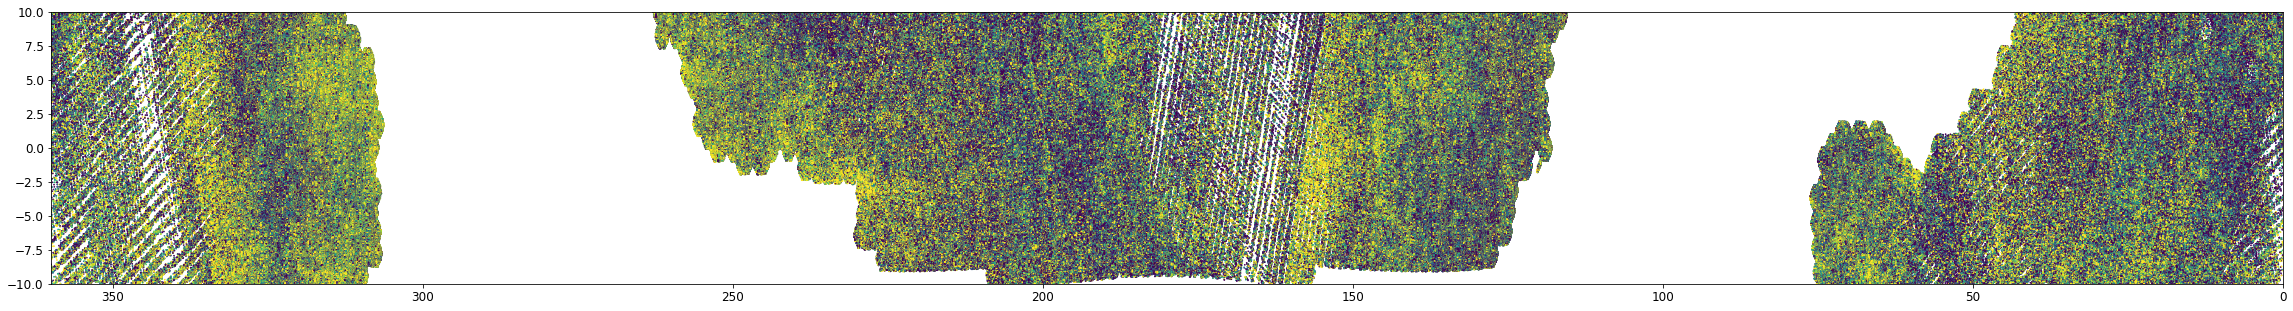

In [32]:
band = 'z'
mask = (cat['ANYMASK_'+band.upper()]==0)
mask &= (gaia['PHOT_BP_MEAN_MAG']-gaia['PHOT_RP_MEAN_MAG'])>0.6
mask &= (gaia['PHOT_BP_MEAN_MAG']-gaia['PHOT_RP_MEAN_MAG'])<2.5
idx = np.where(mask)[0]
print(len(idx))
# idx = np.sort(np.random.choice(idx, size=len(idx)//10))

plt.figure(figsize=(40, 5))
plt.scatter(cat['RA'][idx], cat['DEC'][idx], c=(cat[band+'mag'] - gaia[band+'mag_std'])[idx], s=0.5, vmin=-0.01, vmax=0.01)
plt.axis([360, 0, -10, 10])
plt.show()